# Using deeper CNN on a small MNIST data set

In this script we build deeper CNN with many convolutional layers. Like in the experiments with the fully connected NN with MNIST that we performed last time, we use again a small data with only 2400 images in the training data set so that the NN can be trained on the CPU.

In [1]:
#!pip3 install sklearn ##for docker users

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

Using TensorFlow backend.


Keras 2.2.4 TF 1.13.0-rc1 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train=x_train[0:2400]
Y_train=y_train[0:2400]

X_val=x_train[2400:3000]
Y_val=y_train[2400:3000]

X_test=x_test[0:1000]
Y_test=y_test[0:1000]

del x_train, y_train, x_test, y_test


In [4]:
X_train=np.reshape(X_train, (2400,28,28,1))
X_val=np.reshape(X_val, (600,28,28,1))
X_test=np.reshape(X_test, (1000,28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2400, 28, 28, 1)
(600, 28, 28, 1)
(1000, 28, 28, 1)


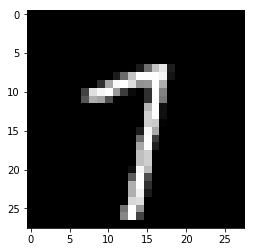

In [5]:
plt.imshow(X_train[42,:,:,0],cmap="gray")

In [6]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(Y_train[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(Y_train[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
Y_train=convertToOneHot(Y_train,num_classes=10)
print(Y_train.shape)
Y_val=convertToOneHot(Y_val,num_classes=10)
print(Y_val.shape)

(2400, 10)
(600, 10)


In [8]:
# here we center and standardize the data
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_val = (X_val - X_mean ) / (X_std + 0.0001)

In [9]:
# here we define  hyperparameter of the NN
batch_size = 128
nb_classes = 10
nb_epoch = 30
img_rows, img_cols = 28, 28
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)

In [10]:
### a deeper CNN model
name = 'cnn2'
model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# here is your code comming:

model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

# end of your code

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(40))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
__________

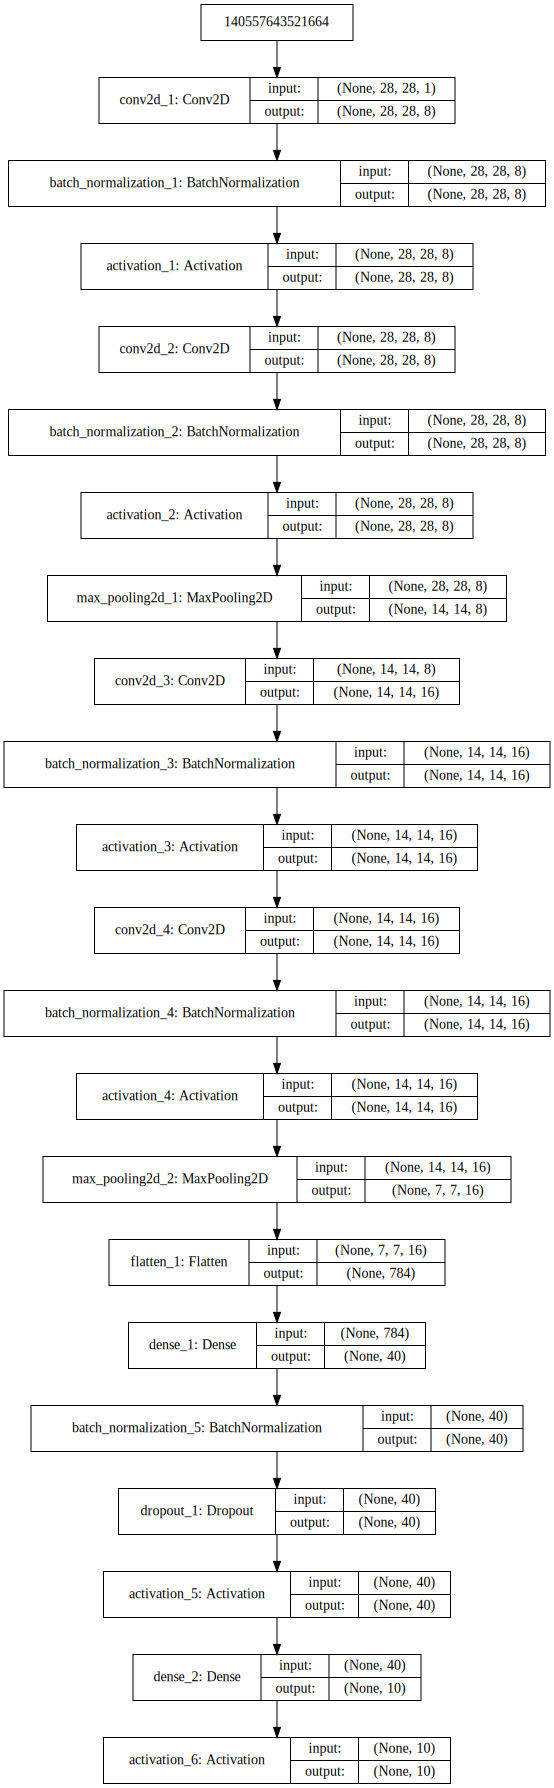

In [12]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [13]:
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/mnist/' + name + '/', 
        write_graph=True,
        histogram_freq=0)

In [14]:
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(X_val, Y_val),
                  callbacks=[tensorboard])

Instructions for updating:
Use tf.cast instead.
Train on 2400 samples, validate on 600 samples
Epoch 1/30
 - 5s - loss: 1.8928 - acc: 0.4033 - val_loss: 1.3938 - val_acc: 0.6317
Epoch 2/30
 - 4s - loss: 1.1564 - acc: 0.7092 - val_loss: 1.1542 - val_acc: 0.7650
Epoch 3/30
 - 4s - loss: 0.8055 - acc: 0.8325 - val_loss: 0.9824 - val_acc: 0.8250
Epoch 4/30
 - 4s - loss: 0.5939 - acc: 0.8854 - val_loss: 0.7845 - val_acc: 0.8600
Epoch 5/30
 - 4s - loss: 0.4600 - acc: 0.9162 - val_loss: 0.6018 - val_acc: 0.8933
Epoch 6/30
 - 4s - loss: 0.3869 - acc: 0.9292 - val_loss: 0.5249 - val_acc: 0.9033
Epoch 7/30
 - 4s - loss: 0.3207 - acc: 0.9458 - val_loss: 0.4663 - val_acc: 0.9150
Epoch 8/30
 - 3s - loss: 0.2689 - acc: 0.9525 - val_loss: 0.4302 - val_acc: 0.9233
Epoch 9/30
 - 3s - loss: 0.2294 - acc: 0.9604 - val_loss: 0.3872 - val_acc: 0.9367
Epoch 10/30
 - 3s - loss: 0.2042 - acc: 0.9692 - val_loss: 0.3619 - val_acc: 0.9400
Epoch 11/30
 - 4s - loss: 0.1780 - acc: 0.9767 - val_loss: 0.3119 - val_ac

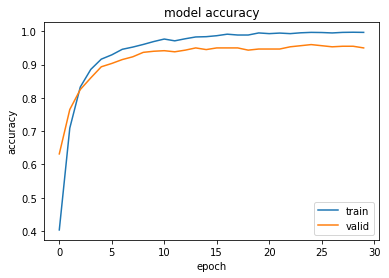

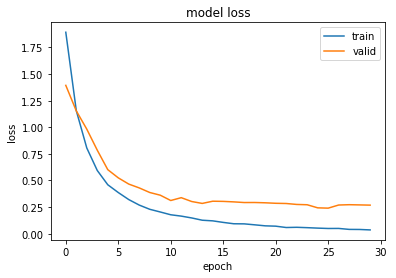

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

## Prediction on the test set


In [16]:
X_test_norm = np.array((X_test - X_mean ) / (X_std + 0.0001),dtype="float32")
pred=model.predict(X_test_norm)
print(confusion_matrix(Y_test,np.argmax(pred,axis=1)))
print("Acc = " ,np.sum(Y_test==np.argmax(pred,axis=1))/len(pred))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 125   1   0   0   0   0   0   0   0]
 [  0   2 111   0   0   0   0   2   1   0]
 [  0   0   0 104   0   1   0   2   0   0]
 [  0   0   1   0 106   0   1   0   0   2]
 [  0   0   0   0   2  85   0   0   0   0]
 [  3   0   1   0   0   1  82   0   0   0]
 [  0   2   4   2   0   0   0  91   0   0]
 [  5   0   2   2   3   0   0   1  75   1]
 [  0   0   0   0   2   2   0   1   0  89]]
Acc =  0.952


In [17]:
#!tensorboard --logdir=tensorboard/tensorboard/mnist/